In [5]:
import numpy as np 
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt 

np.random.seed(42)

In [6]:
# rc = run commands
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

<module 'matplotlib' from 'c:\\Users\\zayaa\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\__init__.py'>


## Loading MNIST (handwritten digits dataset)

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()

print(digits)
print("\n")
print(np.shape(digits.data))
print(np.shape(digits.images))

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [32]:
print(digits.keys())

print("Number of samples/record:", digits.data.shape[0])
print("Number of features per sample:", digits.data.shape[1])
print("Number of classes: ", len(digits.target_names))

print("\nFeature names: ")
print(digits.feature_names)

print("\nTarget names: ")
print(digits.target_names)

print("\nDataset Description: ")
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Number of samples/record: 1797
Number of features per sample: 64
Number of classes:  10

Feature names: 
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5

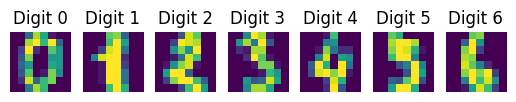

In [39]:
# Visualize the first few digits:
num_digits_to_display = 7
for i in range(num_digits_to_display):
    plt.subplot(1, num_digits_to_display, i+1)
    plt.imshow(digits.images[i])
    plt.title(f"Digit {i}")
    plt.axis("off")

In [41]:
X_digits = digits.data
Y_digits = digits.target

n_samples = len(X_digits)

# use 90% of data for training  because in ML we split data IN HALF into training and testing sets

# training sets - 90% of data
X_train = X_digits[:round(.9 * n_samples)]
y_train = Y_digits[:round(.9 * n_samples)]

# testing sets - 10% of data
X_test = X_digits[round(.9 * n_samples):] 
y_test = Y_digits[round(.9 * n_samples):]

# KNN Classifier:

Let us first try to test to see if we can allow our model to recognize one digit e.g. 5 

To do this, we need a binary classifier to split into 2 classes (results), 5 and not-5.

We need to create target vectors for this classification task, and so lets train our classifier:

In [46]:
from sklearn.neighbors import KNeighborsClassifier

y_train_5 = (y_train == 5) # creates a boolean array of True or False if any of the numbers are 5 or not
y_test_5 = (y_test == 5)

knn_classifier = KNeighborsClassifier(n_jobs=1, weights="distance", n_neighbors=4)
knn_classifier.fit(X_train, y_train_5)

KNeighborsClassifier(n_jobs=1, n_neighbors=4, weights='distance')

Number 0 : [False]
Number 1 : [False]
Number 2 : [False]
Number 3 : [False]
Number 4 : [False]
Number 5 : [ True]
Number 6 : [False]


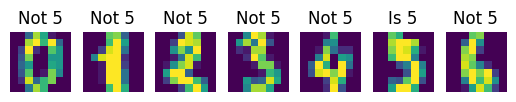

In [56]:
num_digits_to_display = 7
for i in range(num_digits_to_display):
    plt.subplot(1, num_digits_to_display, i+1)
    # Display the image
    plt.imshow(digits.images[i])

    # making the prediction
    digit_eval = np.reshape(digits.data[i], (1, -1))
    classification = knn_classifier.predict(digit_eval)
    print(f"Number {i} :", classification)

    if classification == True: plt.title("Is 5")
    if classification == False: plt.title("Not 5")
    plt.axis("off")

plt.show()

# Now let us evaluate performance

In [57]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(knn_classifier, X_train, y_train_5, cv=3, scoring="accuracy")
print(score)

[0.99628942 0.99443414 0.99628942]


# or instead we can use confusion matrix:
    confusion matrix tells us how many times the classifier confused images e.g. 5s with 3s so therefore we would look at the result in the 5th row, 3rd column

    Adding on, to compute the confusion matrix, we just have a set of predictions so they can be compared to the actual targets (we normally dont wanna test these predictions on the test set UNTIL THE VERY END)

    we can use the cross_val_predict() function to perform k-fold cross validation and so it returns predictions on each test fold like cross_val_score()

In [58]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_prediction = cross_val_predict(knn_classifier, X_train, y_train_5, cv=3)
matrix = confusion_matrix(y_train_5, y_train_prediction)
print(matrix)

[[1452    1]
 [   6  158]]


Each row in a confusion matrix represents an actual class, while each column represents a predicted class. The first row of this matrix considers non-5 images (the negative class): 1,452 of them were correctly classified as non-5s (they are called TRUE NEGATIVES), while the remaining 1 was wrongly classified as 5s (FALSE POSITIVES). The second row considers the images of 5s (THE POSITIVE CLASS): 6 were wrongly classified as non-5s (FALSE NEGATIVES), while the remaining 158 were correctly classified as 5s (TRUE POSITIVES). A PERFECT CLASSIFER WOULD ONLY HAVE TRUE POSITIVES AND TRUE NEGATIVES, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):